<a href="https://colab.research.google.com/github/002001/ITB2022/blob/main/ITB_%EA%B8%B0%EB%A7%90_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%ED%86%B5%EC%8B%A0%EC%82%AC_%EA%B0%80%EC%9E%85%EC%9E%90_%EC%9D%B4%ED%83%88%EB%A5%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Installing

In [527]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [528]:
!pip install mglearn
!pip install --upgrade joblib==1.1.0
import mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [529]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.gridspec as gs
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [530]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ITB/project/WA_Fn-UseC_-Telco-Customer-Churn.csv", index_col=0)

##데이터전처리

###Column 설명

*   customerID : 소비자의 식별자
*   gender : 성별
*   SeniorCitizen : 노인인지의 여부
*   Partner : 배우자의 유무
*   Dependents : 자녀의 유무
*   tenure : 고객의 가입 기간 (개월 수)
*   PhoneService : 휴대폰 서비스를 가입 했는지의 여부
*   MultipleLines : 여러 개의 통신선을 서비스 받고 있는지의 여부 (Yes, No, No phone service) / 휴대폰 서비스를 가입한 고객만 해당됨.
*   InternetService : 인터넷 서비스 제공자 (DSL, Fiber optic, No)
*   OnlineSecurity : 온라인 보안 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
*   OnlineBackup : 온라인 백업 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
*   DeviceProtection 기기 보호 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
*   TechSupport : 기술 서포트 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
*   StreamingTV : TV 스트리밍 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
*   StreamingMovies : 영화 스트리밍 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
*   Contract : 계약 유형 (Month-to-month, One year, Two year)
*   PaperlessBilling : 전자 고지서 여부
*   PaymentMethod : 요금 지불 방법 (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
*   Contract : 계약 유형 (Month-to-month, One year, Two year)
*   MonthlyCharges : 매달 고객에게 청구되는 금액
*   TotalCharges : 고객에게 청구된 총 금액
*   Churn : 지난 한 달 내에 떠난 고객인지의 여부

In [531]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [532]:
df.shape

(7043, 20)

In [533]:
df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [534]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [535]:
#필요없는 Column 삭제
df =df.reset_index()
df.drop(['customerID'],axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


🔼송현님 데이터 파일이랑 제 데이터 파일이 달라서 그런지

제 파일은 Customer ID 항목이 인덱스로 지정되어있더라구요! 저는 인덱스 없앤 후 Column 삭제하는 방식으로 진행했습니다


ㅤ




---



In [536]:
# categorical Variables (범주형 변수)
categorical_variables = [col for col in df.columns if col in "O"
                        or df[col].nunique() <=11
                        and col not in "Exited"]

categorical_variables

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [537]:
# Numeric Variables (수치형 변수)
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >11
                        and col not in "CustomerId"]
numeric_variables

['tenure', 'MonthlyCharges']

In [538]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [539]:
#Removing missing values 
df.dropna(inplace = True)



---



Column 생성: 파트너와 자녀로 구분해서 나누기

가족단위로: 인구통계학적 원인/서비스

-싱글 (파트너/자녀 무) -커플 -패밀리 -한부모

In [540]:
#Family 칼럼 추가하기
Family = [
    (df['Partner'] == 'Yes') & (df['Dependents'] == 'Yes'),
    (df['Partner'] == 'Yes') & (df['Dependents'] == 'No'),
    (df['Partner'] == 'No') & (df['Dependents'] == 'Yes'),
    (df['Partner'] == 'No') & (df['Dependents'] == 'No')
]

vals = ['Family', 'Couple', 'Single parent', 'Single']
df['Family'] = np.select(Family, vals)

In [541]:
print(df["Family"].value_counts())

Single           3280
Family           1740
Couple           1653
Single parent     359
Name: Family, dtype: int64


In [542]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


ㅤ

ㅤ

##EDA

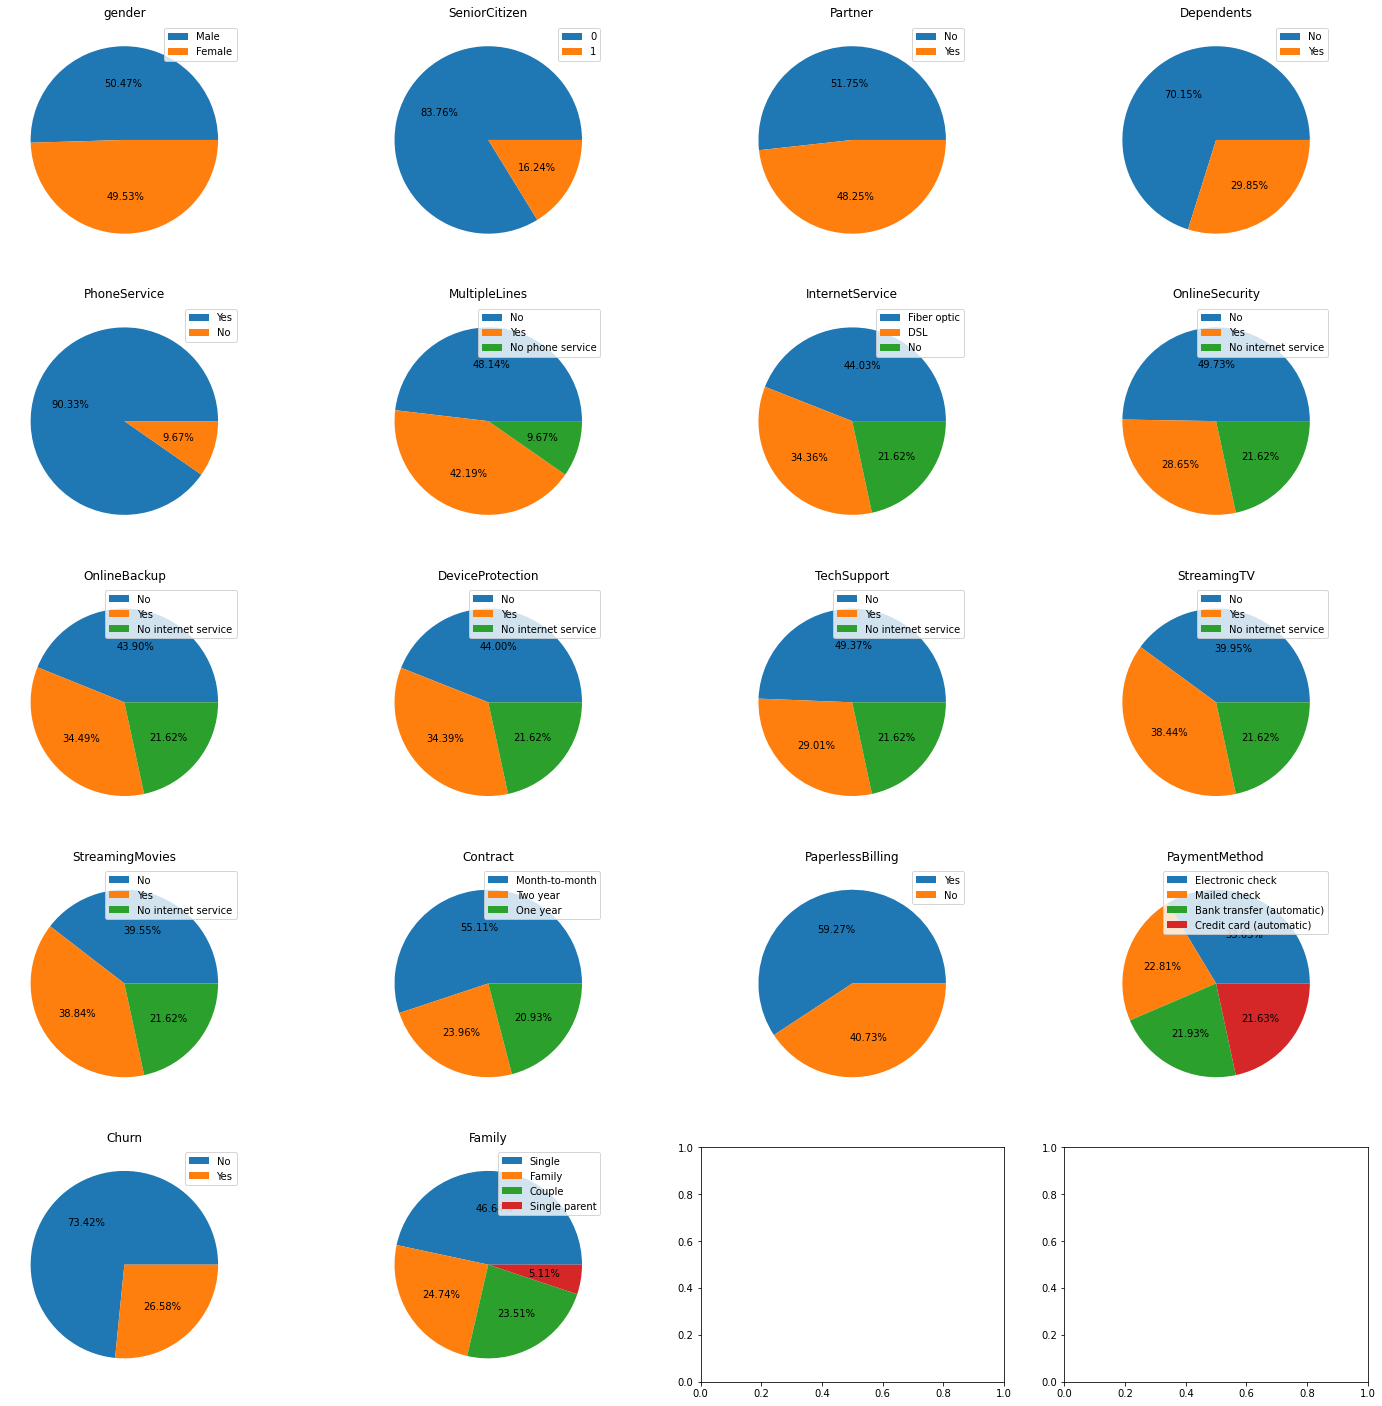

In [543]:
import math

columns = df.columns.tolist()
dellist = ['tenure','MonthlyCharges','TotalCharges']
for i in dellist:
    columns.remove(i)
    
f, axes = plt.subplots(math.ceil(len(columns)/4),4, figsize=(25,25))
for col, ax in zip(columns, axes.ravel()):
        data = df[col].value_counts().values.tolist()
        labels = df[col].value_counts().index.tolist()
        ax.pie(data,autopct='%0.2f%%')
        ax.set_title(col)
        ax.legend(labels,loc='best')



---



In [544]:
columns_idx = np.s_[0:] # Slice of first row(header) with all columns.
first_record_idx = np.s_[0] # Index of first record

string_fields = [type(fld) is str for fld in df.iloc[first_record_idx, columns_idx]] # All string fields
all_features = [x for x in df.columns if x != 'Churn']
categorical_columns = list(np.array(df.columns)[columns_idx][string_fields])
categorical_features = [x for x in categorical_columns if x != 'Churn']
continuous_features = [x for x in all_features if x not in categorical_features]

IndexError: ignored

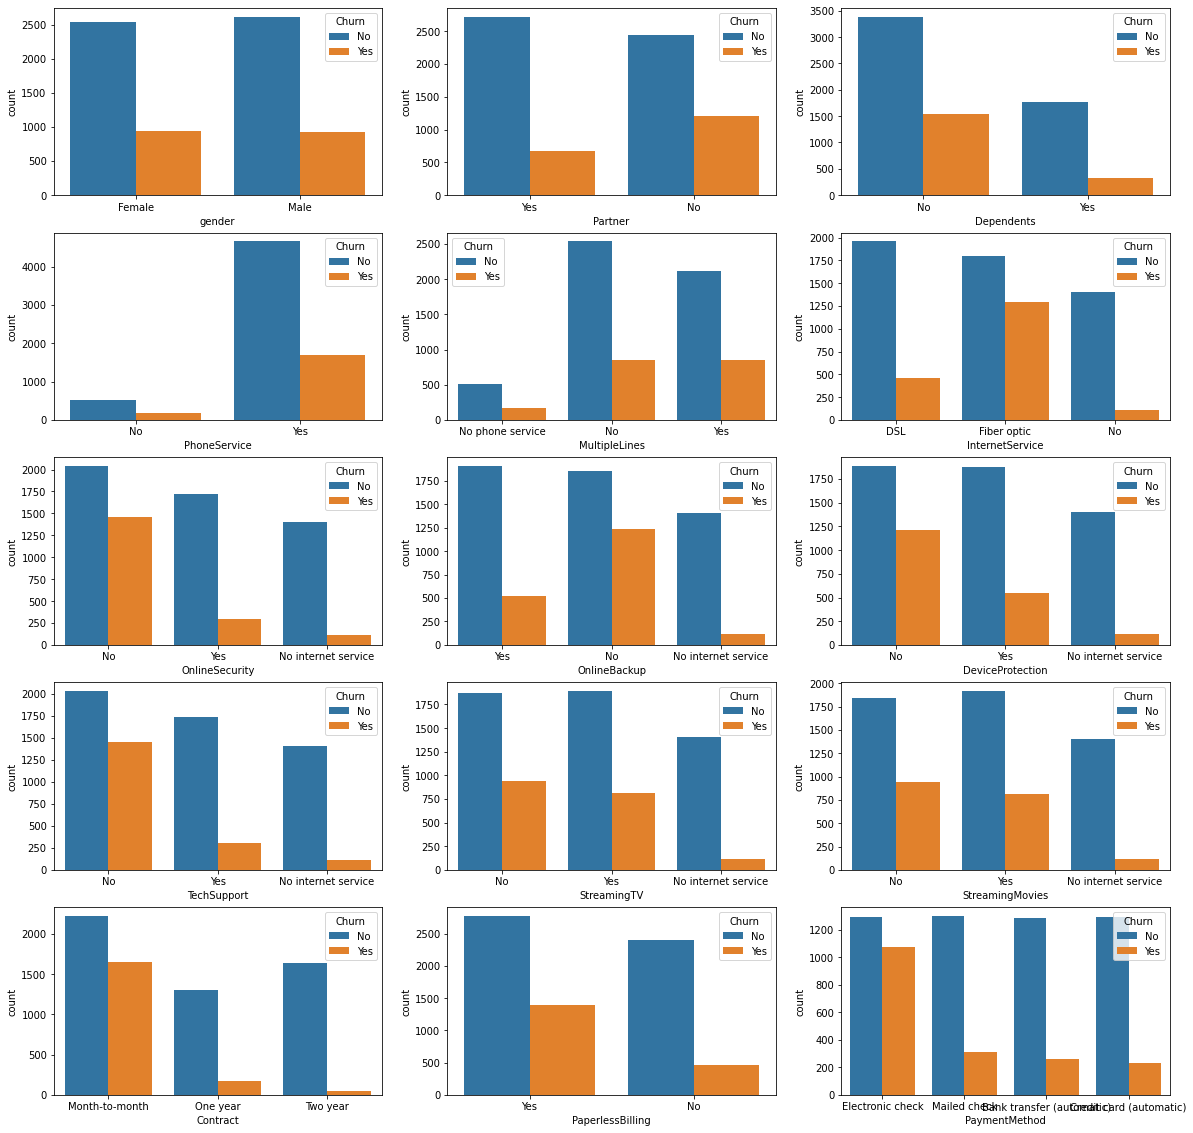

In [545]:
# Categorical feature count plots
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15)) = plt.subplots(5, 3, figsize=(20, 20))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15 ]

for i in range(len(categorical_features)):
    sns.countplot(x = categorical_features[i], hue="Churn", data=df, ax=ax[i])


1.   **gender**: 성별 간의 이탈률 차이는 없는 것으로 보임
2.   **SeniorCitizen**: 노인의 이탈률이 높음
3.   **Partner/Dependents/Family**:

  Partner가 있는 사람이 Partner가 없는 사람에 비해 이탈률이 낮음 -> Partner가 없을수록 이탈하는 경향이 있다. 
  
  Dependents가 있는 사람이 없는 사람에 비해 이탈률이 낮음 -> Dependents가 없을수록 이탈하는 경향이 있다.
  
  Family(Partner有 / Defendents有)의 이탈률 비중이 제일 적고, Single(Partner無 / Defendents無)의 이탈률이 가장 높다.

    *통신사 결합 상품의 영향/가족결합혜택 때문이라 예상됨


4.   **PhoneService**: 서비스를 사용하는 고객이 사용하지 않는 고객보다 많다.
5.   **MultipleLines**: MultipleLines를 이용하는 사람은 이용하지 않는 사람보다 이탈률이 높다.(통신선을 여러 곳에서 사용하다보니 이탈률이 높은 것으로 예상됨)
6.   **InternetService**:   Fiber optic를 이용하는 고객의 이탈률이 가장 높은 이탈률을 보이는 경향이 있다. internet service를 이용하는 고객일수록 이탈할 가능성이 있다.
7.   **OnlineSecurity**: OnlineSecurity를 이용하지 않는 고객일수록 이탈할 가능성이 높다.
8.   **OnlineBackup**: OnlineBackup 서비스를 이용하지 않는 고객일수록 이탈할 가능성이 높다.
9.   **DeviceProtection**: DeviceProtection 서비스를 이용하지 않는 고객일수록 이탈할 가능성이 높다.
10.   **TechSupport**: TechSupport 서비스를 이용하지 않는 고객일수록 이탈 가능성이 높다.


ㅤ*MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport 서비스는 이용하지 않는 고객일수록 이탈 가능성이 높다.*



11. ** StreamingTV**: StreamingTV를 사용하는 고객과 사용하지 않는 고객의 이탈률 차이가 크지 않다. V 스트리밍 서비스는 이탈률과 무관하다.
12.  **Contract**: 계약 유형 중 월별 주기로 결제하는 서비스의 이탈률이 가장 높다. 계약(결제) 주기가 짧을수록 이탈 가능성이 높고, 계약 주기가 길수록 이탈률이 낮다.
13.  **PaperlessBilling**: 전자고지서를 사용하는 고객이 그렇지 않은 고객보다 이탈 가능성이 높다.
14. **PaymentMethod**: 다른 유형에 비해 Electronic check를 이용하는 고객의 이탈률이 높다.
ㅤ



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd0b894b90>,
      dtype=object)

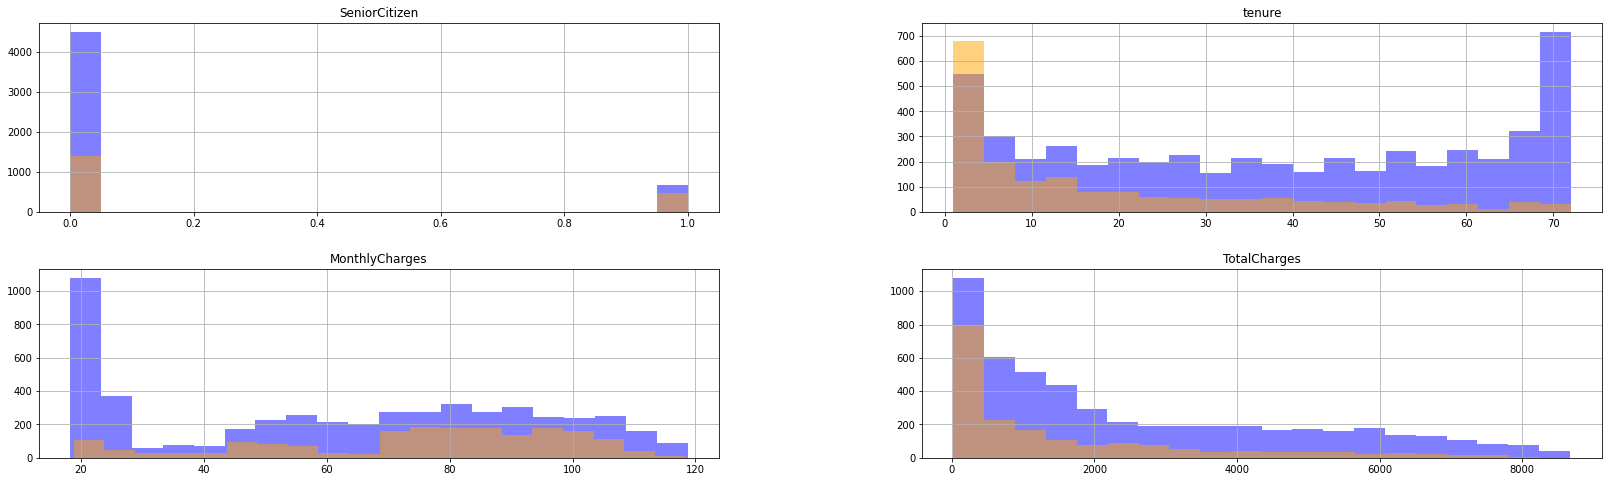

In [546]:
# Continuous feature histograms.
fig, ax = plt.subplots(2, 2, figsize=(28, 8))
df[df.Churn == 'No'][continuous_features].hist(bins=20, color="blue", alpha=0.5, ax=ax)
df[df.Churn == 'Yes'][continuous_features].hist(bins=20, color="orange", alpha=0.5, ax=ax)

15.  **Tenure**: 가입기간이 적을수록 이탈 확률이 높다.
16. **TotalCharges**: TotalCharges가 높을수록 이탙률이 적다. -> 토탈비용이 높다는 것은 그만큼 오래 통신사를 이용했다는 것으로, 이용 기간이 길수록 이탈률이 적다.

ㅤ

ㅤ

##상관관계

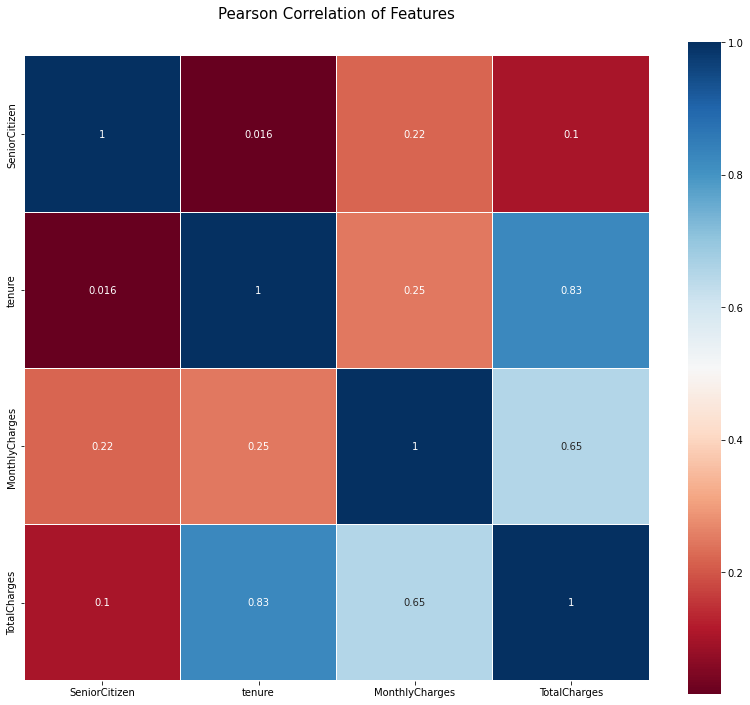

In [547]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1, vmax=1.0,square=True, cmap=colormap, linecolor='white', annot=True)